In [60]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from notebooks.utils import load_sae, get_group_indices, get_group_norms

In [3]:
sae = load_sae("runs/run_lat5000_bs512_auxk0.03_k256_epoch10_1352511/0") #l2 norm

In [4]:
sae.W_dec.shape

torch.Size([5000, 99648])

In [12]:
path = "weights2weights/weights_datasets/" 
dim_df = torch.load(path + "weight_dimensions_extended_df.pt")
input_group_norms = torch.load(path + "group_norms.pt")
input_group_norms.shape

torch.Size([7])

In [13]:
dim_df

,0,1,lengths,start,end,block_type,block_number,attentions_number,attn_number,attn_proj,lora_ab
base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_A.weight,"(320,)","(1, 320)",320,0,320,down_blocks,0,0,1,to_q,A
base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_q.lora_B.weight,"(320,)","(320, 1)",320,320,640,down_blocks,0,0,1,to_q,B
base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora_A.weight,"(320,)","(1, 320)",320,640,960,down_blocks,0,0,1,to_v,A
base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn1.to_v.lora_B.weight,"(320,)","(320, 1)",320,960,1280,down_blocks,0,0,1,to_v,B
base_model.model.down_blocks.0.attentions.0.transformer_blocks.0.attn2.to_q.lora_A.weight,"(320,)","(1, 320)",320,1280,1600,down_blocks,0,0,2,to_q,A
...,...,...,...,...,...,...,...,...,...,...,...
base_model.model.up_blocks.3.attentions.2.transformer_blocks.0.attn1.to_v.lora_B.weight,"(320,)","(320, 1)",320,97600,97920,up_blocks,3,2,1,to_v,B
base_model.model.up_blocks.3.attentions.2.transformer_blocks.0.attn2.to_q.lora_A.weight,"(320,)","(1, 320)",320,97920,98240,up_blocks,3,2,2,to_q,A
base_model.model.up_blocks.3.attentions.2.transformer_blocks.0.attn2.to_q.lora_B.weight,"(320,)","(320, 1)",320,98240,98560,up_blocks,3,2,2,to_q,B
base_model.model.up_blocks.3.attentions.2.transformer_blocks.0.attn2.to_v.lora_A.weight,"(768,)","(1, 768)",768,98560,99328,up_blocks,3,2,2,to_v,A


In [19]:
decoder_norms = get_group_norms(get_group_indices(dim_df), sae.W_dec, input_group_norms)
decoder_norms.shape

torch.Size([5000, 7])

In [40]:
relative_norms = decoder_norms.div(decoder_norms.sum(dim=1,keepdim=True))
relative_norms.shape

torch.Size([5000, 7])

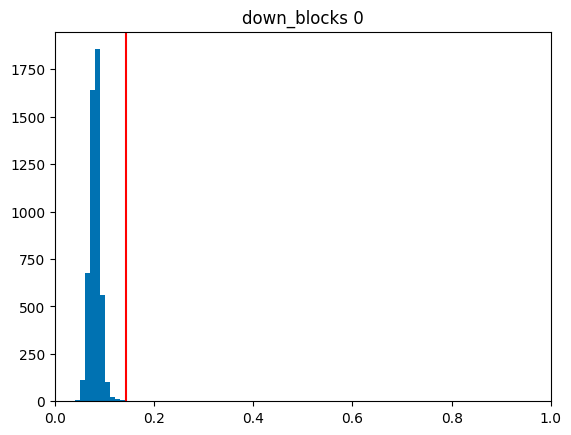

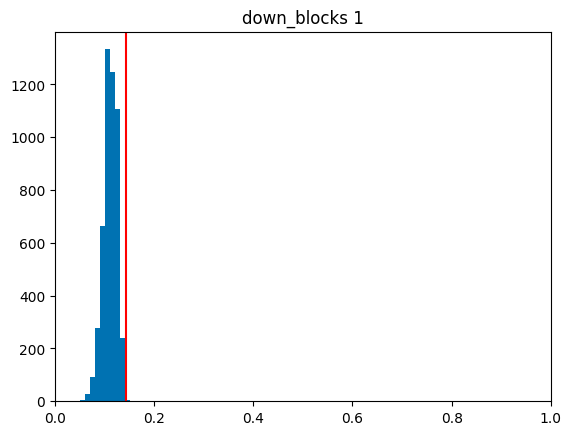

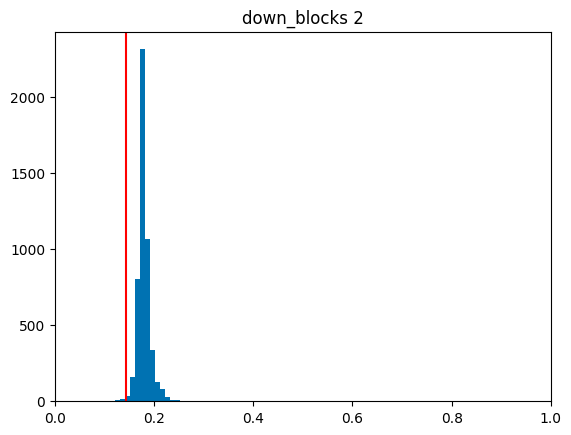

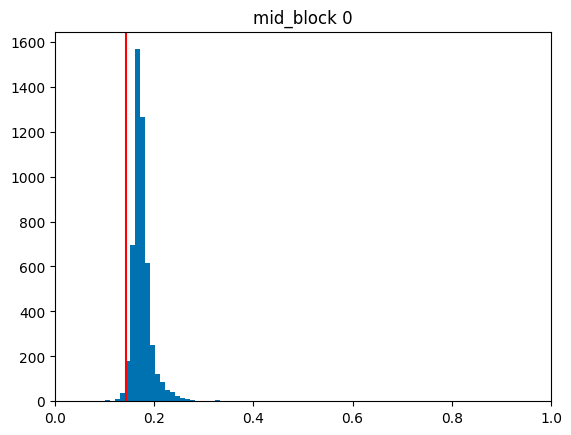

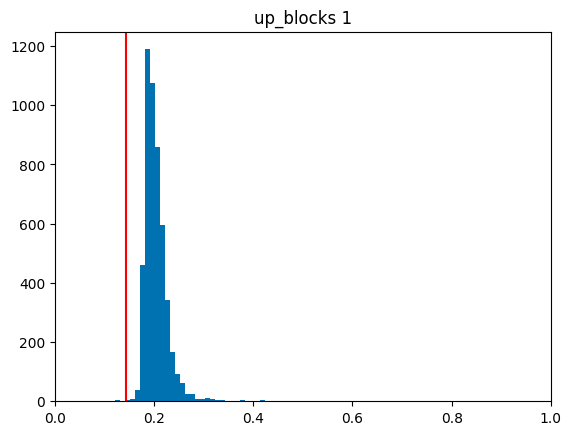

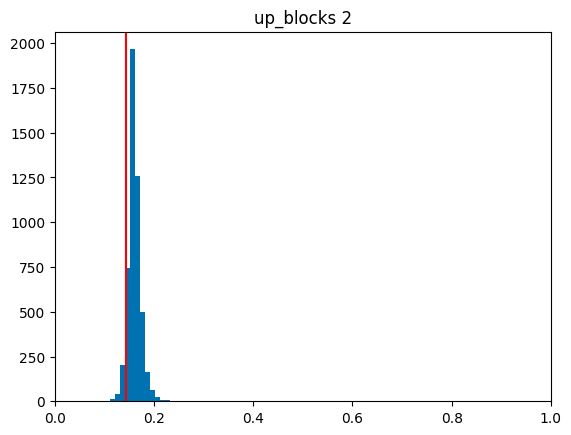

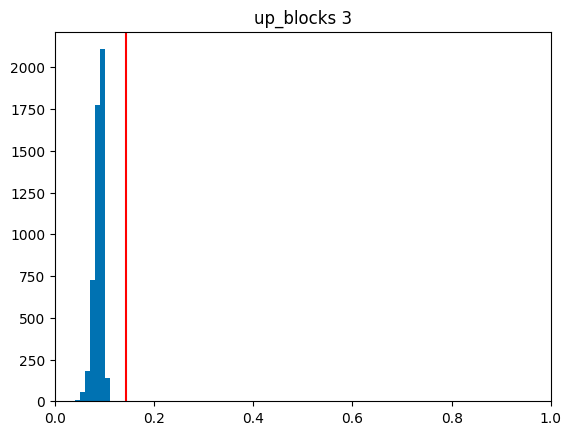

In [82]:
for i, (block, n) in dim_df[["block_type", "block_number"]].reset_index(drop=True).drop_duplicates().reset_index(drop=True).iterrows():
    plt.hist(relative_norms[:, i].cpu().detach(), bins=np.linspace(0,1,100))
    plt.title(f"{block} {n}")
    plt.axvline(1/7, color='red')
    plt.xlim((0,1))
    plt.show()